<a href="https://colab.research.google.com/github/juccaicedoac03/Data_Science_Course/blob/main/1_Ra%C3%ADces_de_funciones/2_Regula_falsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de falsa posición (Regula falsi)

**Background:** 

Un inconveniente del método de bisección es que al dividir el intervalo de xl a xu en mitades iguales, no se toman en consideración las magnitudes de $f(x_l)$ y $f(x_u)$.

\\

**Clave:** 

Unir $f(x_l)$ y $f(x_u)$ con una línea recta. La intersección de esta línea con el eje de las $x$ representa una mejor aproximación de la raíz. 

Se utiliza triángulos semejantes, la intersección de la línea recta con el eje de las x se estima de la siguiente manera:

<img src="https://github.com/juccaicedoac03/Numeric_methods_and_Optimization_Course/blob/main/1_Ra%C3%ADces_de_funciones/Figs/RegFalsi.png?raw=true:, width=100" alt="find roots" width=400>


**Triángulos semejantes:**

$$ \frac{f(x_l)}{x_r - x_l} = \frac{f(x_u)}{x_r - x_u}$$

\\
$$ x_{r} = x_u-\frac{f(x_u)(x_l - x_u)}{f(x_l)-f(x_u)}$$

\\
**Ejercicio:** Realizar demostración de la euación anterior.

\\
El valor de $x_r$ calculado con la ecuación, reemplazará, después, a cualquiera de los dos valores iniciales, $x_l$ o $x_u$, y da un valor de la función con el mismo signo de $f(x_r)$. De esta manera, los valores $x_l$ y $x_u$ siempre encierran la verdadera raíz. 


\\
El proceso se repite hasta que la aproximación a la raíz sea adecuada.

\\
**Desventajas:** 

Unilateralidad: conforme se avanza en las iteraciones, uno de los puntos limitantes del intervalo tiende a permanecer fijo. Esto puede llevar a una mala convergencia, especialmente en funciones con una curvatura importante.

\\
**Solución:** 

Una forma de disminuir la naturaleza unilateral de la falsa posición consiste en obtener un algoritmo que detecte cuando se “estanca” uno de los límites del intervalo. Si ocurre esto, se divide a la mitad el valor de la función en el punto de “estancamiento”. A este método se le llama método de la *falsa posición modificado*.

\\
*En el código:* 

Se usa contadores para determinar si uno de los límites del intervalo permanece fijo “estancado” durante dos iteraciones. Si ocurre así, el valor de la función en este valor de “estancamiento” se divide a la mitad.

# Algoritmo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fn(x): # Creamos la función 
    return (x**10)-1

In [18]:
X = np.arange(0,1.4,0.05)

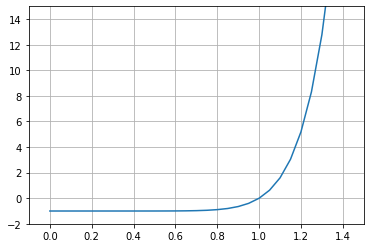

In [19]:
plt.plot(X,fn(X))
plt.xlim([-0.1,1.5])
plt.ylim([-2,15])
plt.grid(True)
plt.show()

In [24]:
# parámetros iniciales

xl = 0
xu = 1.3

es = 0.5
imax = 15


# algoritmo iterativo

ea = abs(xu - xl)

iter = 0
fl = fn(xl)
fu = fn(xu)

xr = xl

iu = 0
il = 0

while (ea > es) and (iter <= imax):

    xrold = xr
    xr = xu - (fu*(xl - xu)/(fl - fu))
    fr = fn(xr)

    iter += 1
    
    if xr != 0:
        ea = abs((xr-xrold)/xr) * 100
    
    test = fl * fr

    if test <0:
        xu = xr
        fu = fn(xu)
        iu = 0
        il = il +1
        if il >= 2:
            fl = fl/2
    elif test > 0:
        xl = xr
        fl = fn(xl)
        il = 0
        iu = iu + 1
        if iu >= 2:
            fu = fu/2
    else:
        ea = 0

    print('Iter: {}  x_l: {}  x_u: {}  x_r: {}  E_a: {}'.format(iter, np.round(xl,3), np.round(xu,3) , np.round(xr,3), np.round(ea,3)))


Iter: 1  x_l: 0.094  x_u: 1.3  x_r: 0.094  E_a: 100.0
Iter: 2  x_l: 0.182  x_u: 1.3  x_r: 0.182  E_a: 48.118
Iter: 3  x_l: 0.333  x_u: 1.3  x_r: 0.333  E_a: 45.421
Iter: 4  x_l: 0.563  x_u: 1.3  x_r: 0.563  E_a: 40.896
Iter: 5  x_l: 0.846  x_u: 1.3  x_r: 0.846  E_a: 33.428
Iter: 6  x_l: 0.846  x_u: 1.075  x_r: 1.075  E_a: 21.262
Iter: 7  x_l: 0.945  x_u: 1.075  x_r: 0.945  E_a: 13.688
Iter: 8  x_l: 0.983  x_u: 1.075  x_r: 0.983  E_a: 3.796
Iter: 9  x_l: 0.983  x_u: 1.004  x_r: 1.004  E_a: 2.121
Iter: 10  x_l: 1.0  x_u: 1.004  x_r: 1.0  E_a: 0.442


**Ejercicio:** Graficar las rectas de cada iteración

**Ejercicio:** Crear una función que encuentre las raíces de una función a través del método de la falsa posición y probarlo con 3 funciones distintas.

**Ejercicio:** Realizar una comparación del método de falsa pocición y el de bisección. Decir cual es mejor y en que casos.

**Ejercicio:** ¿Cual es la complejidad del método de falsa posición? 